In [1]:
%run -m celldom.nb.logging
import os
import os.path as osp
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from celldom.config import experiment_config
from celldom import annotation
from celldom.execute import processing
from cvutils.visualize import display_images
import celldom
plt.gray()
None

In [2]:
config = experiment_config.ExperimentConfig(celldom.get_config('experiment', 'exp-20180614-G3-K562-imatinib-poc-01'))

In [3]:
files = !find /lab/data/celldom/dataset/dataset02/*.jpg | head -n 10
files

['/lab/data/celldom/dataset/dataset02/BF_ST_000_APT_000Day0.jpg',
 '/lab/data/celldom/dataset/dataset02/BF_ST_000_APT_000Day1.jpg',
 '/lab/data/celldom/dataset/dataset02/BF_ST_000_APT_000Day2.jpg',
 '/lab/data/celldom/dataset/dataset02/BF_ST_000_APT_000Day3.jpg',
 '/lab/data/celldom/dataset/dataset02/BF_ST_000_APT_001Day0.jpg',
 '/lab/data/celldom/dataset/dataset02/BF_ST_000_APT_001Day1.jpg',
 '/lab/data/celldom/dataset/dataset02/BF_ST_000_APT_001Day2.jpg',
 '/lab/data/celldom/dataset/dataset02/BF_ST_000_APT_001Day3.jpg',
 '/lab/data/celldom/dataset/dataset02/BF_ST_000_APT_002Day0.jpg',
 '/lab/data/celldom/dataset/dataset02/BF_ST_000_APT_002Day1.jpg']

In [4]:
# from skimage.measure import regionprops
# x = np.zeros(shape=(64, 64), dtype=int)
# x[32, 32:35] = 1
# x[33, 30:33] = 1
# p = regionprops(x)[0]

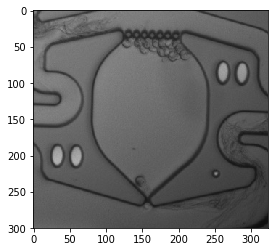

In [5]:
plt.imshow(io.imread(files[1]))

In [10]:
import imp
imp.reload(processing)

<module 'celldom.execute.processing' from '/lab/repos/celldom/python/source/celldom/execute/processing.py'>

In [12]:
!mkdir -p /tmp/test
res = list(processing.run_cell_detection(config, files))

Using TensorFlow backend.
100%|██████████| 10/10 [00:04<00:00,  3.49it/s]


In [13]:
len(res)

10

In [60]:
res[0]

('/lab/data/celldom/dataset/dataset02/BF_ST_000_APT_000Day0.jpg',
 (300, 324, 3),
 [],
 [{'component': 'trap', 'occupancy': 0.0},
  {'component': 'chamber', 'occupancy': 0.0}])

In [65]:
docs = [annotation.get_image_xml(r[0], r[1], r[2]) for r in res]

In [71]:
print(docs[1][:500])


<!-- Jinja2 Render -->
<annotation>
    <folder></folder>
    <filename>BF_ST_000_APT_000Day1.jpg</filename>
    <size>
        <width>324</width>
        <height>300</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>Cell</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <polygon>
            <x1>149</x1>
            <y1>39</y1>
            <x2>146</


## CLI Testing

In [72]:
! ls /lab/repos/celldom/config/experiment/exp-20180614-G3-K562-imatinib-poc-01.yaml

/lab/repos/celldom/config/experiment/exp-20180614-G3-K562-imatinib-poc-01.yaml


In [79]:
!celldom run_annotator \
--experiment-config-path=/lab/repos/celldom/config/experiment/exp-20180614-G3-K562-imatinib-poc-01.yaml \
--data-file-patterns='/lab/data/celldom/dataset/dataset02/BF_ST_000_APT_000Day*.jpg' \
--output-dir='/lab/data/celldom/tmp/annotation-test' \
--copy-original-images=True

INFO:cli:Found 4 raw data files to process
INFO:cli:Beginning cell detection for 4 files
Using TensorFlow backend.
100%|#############################################| 4/4 [00:03<00:00,  1.02it/s]
INFO:cli:Cell detection complete
INFO:cli:Converting detected cells into RectLabel xml
INFO:cli:Writing XML annotations to path "/lab/data/celldom/tmp/annotation-test" (with original images copied)
INFO:cli:Annotation complete (all results in /lab/data/celldom/tmp/annotation-test)
